In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 13165 files belonging to 2 classes.
Using 10532 files for training.
Found 13165 files belonging to 2 classes.
Using 2633 files for validation.
['negatives', 'positives']
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 30752)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                984096    
          

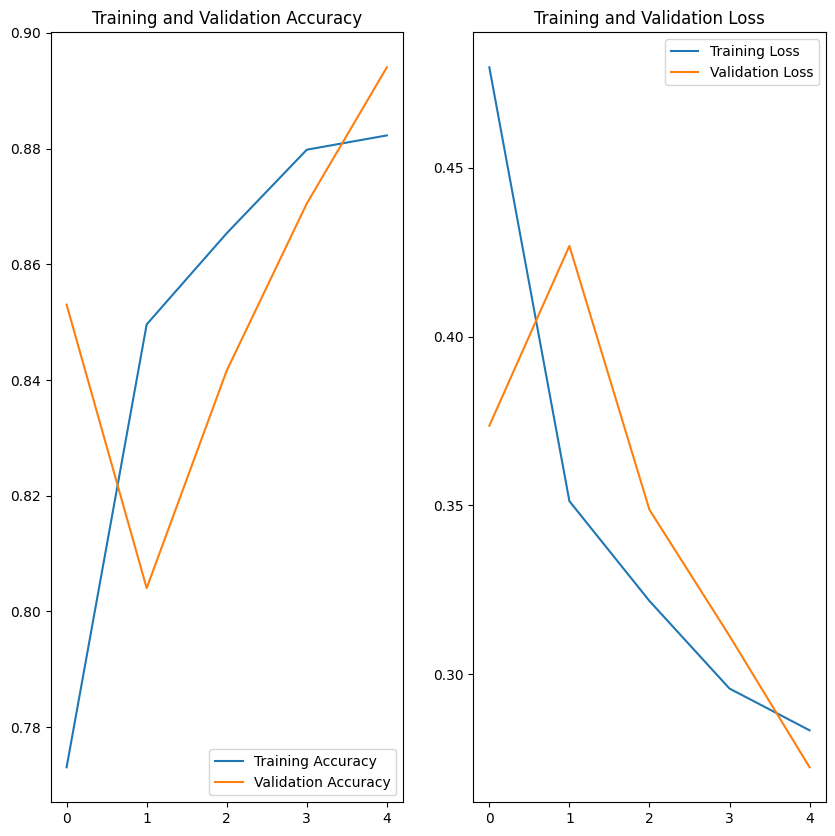

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

# Veri Yolu
data_dir = pathlib.Path("/content/drive/MyDrive/SMILEs")

# Ayarlar
batch_size = 32
image_height = 64
image_width = 64

# Eğitim ve Doğrulama Veri Setlerinin Oluşturulması
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size)

# Sınıf İsimlerinin Yazdırılması
class_names = train_ds.class_names
print(class_names)

# Performans İyileştirme
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Sınıf Sayısı
num_classes = len(class_names)

# Basit CNN Modeli
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes)
])

# Modelin Derlenmesi
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Modelin Özeti
model.summary()

# Eğitim ve Doğrulama Veri Setlerinin Boyutlarının Yazdırılması
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

# Modelin Eğitilmesi
num_epochs = 5
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=num_epochs)

# Eğitim Sonuçlarının Görselleştirilmesi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(num_epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Found 13165 files belonging to 2 classes.
Using 10532 files for training.
Found 13165 files belonging to 2 classes.
Using 2633 files for validation.
['negatives', 'positives']
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 30752)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                984096    
          

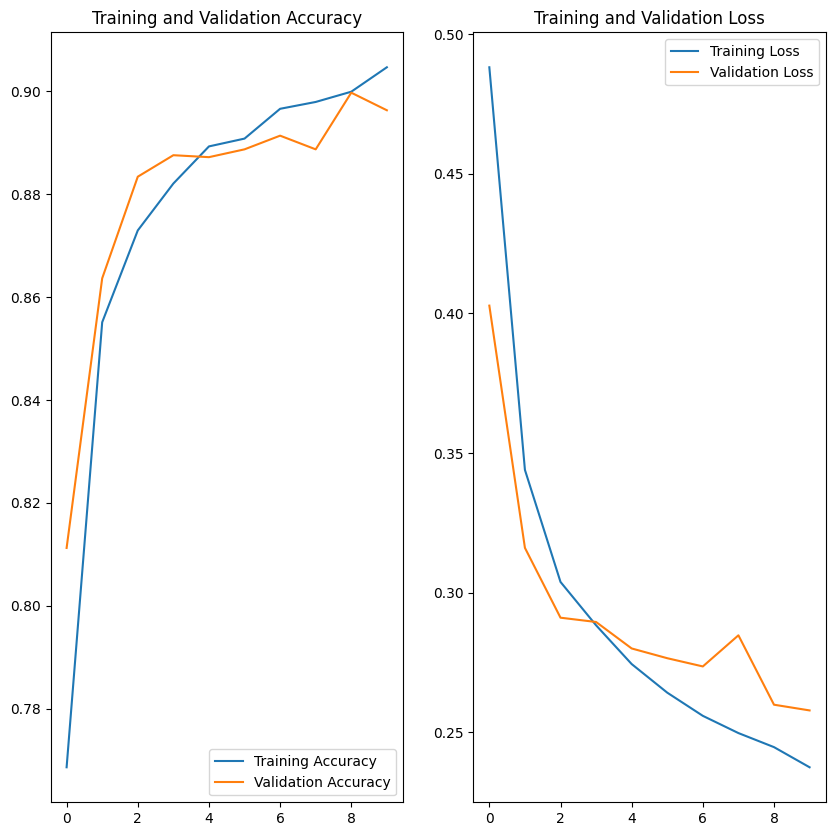

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

# Veri Yolu
data_dir = pathlib.Path("/content/drive/MyDrive/SMILEs")

# Ayarlar
batch_size = 32
image_height = 64
image_width = 64

# Eğitim ve Doğrulama Veri Setlerinin Oluşturulması
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size)

# Sınıf İsimlerinin Yazdırılması
class_names = train_ds.class_names
print(class_names)

# Performans İyileştirme
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Sınıf Sayısı
num_classes = len(class_names)

# Basit CNN Modeli
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes)
])

# Modelin Derlenmesi
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Modelin Özeti
model.summary()

# Eğitim ve Doğrulama Veri Setlerinin Boyutlarının Yazdırılması
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

# Modelin Eğitilmesi
num_epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=num_epochs)

# Eğitim Sonuçlarının Görselleştirilmesi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(num_epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Found 13165 files belonging to 2 classes.
Using 10532 files for training.
Found 13165 files belonging to 2 classes.
Using 2633 files for validation.
['negatives', 'positives']
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 128)       3584      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 31, 31, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 100)       115300    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 100)       0         
 g2D)     

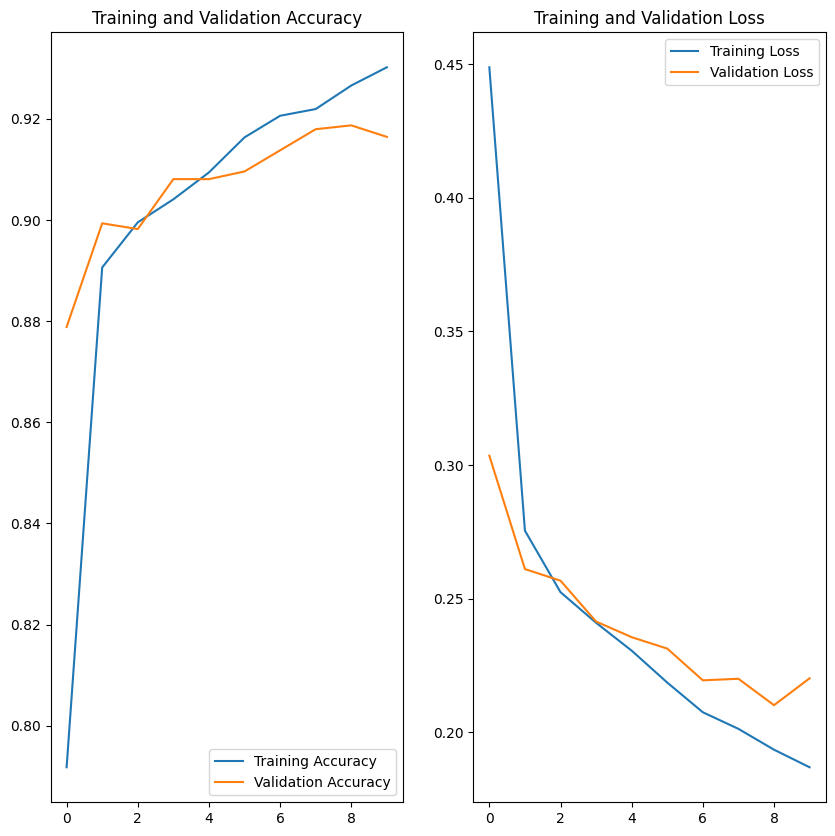

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

# Veri Yolu
data_dir = pathlib.Path("/content/drive/MyDrive/SMILEs")

# Ayarlar
batch_size = 32
image_height = 64
image_width = 64

# Eğitim ve Doğrulama Veri Setlerinin Oluşturulması
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size)

# Sınıf İsimlerinin Yazdırılması
class_names = train_ds.class_names
print(class_names)

# Performans İyileştirme
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Sınıf Sayısı
num_classes = len(class_names)

# CNN Modeli
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(100, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(72, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

# Modelin Derlenmesi
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Modelin Özeti
model.summary()

# Eğitim ve Doğrulama Veri Setlerinin Boyutlarının Yazdırılması
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

# Modelin Eğitilmesi
num_epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=num_epochs)

# Eğitim Sonuçlarının Görselleştirilmesi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(num_epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



Found 13165 files belonging to 2 classes.
Using 10532 files for training.
Found 13165 files belonging to 2 classes.
Using 2633 files for validation.
['negatives', 'positives']
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 128)       3584      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 100)       115300    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 100)       0         
 g2D)     

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


330/330 [==============================] - 284s 857ms/step - loss: 0.5975 - accuracy: 0.7207 - val_loss: 0.6118 - val_accuracy: 0.7144
Epoch 2/10
330/330 [==============================] - 272s 825ms/step - loss: 0.5954 - accuracy: 0.7210 - val_loss: 0.5993 - val_accuracy: 0.7144
Epoch 3/10
330/330 [==============================] - 274s 831ms/step - loss: 0.5947 - accuracy: 0.7210 - val_loss: 0.6049 - val_accuracy: 0.7144
Epoch 4/10
330/330 [==============================] - 277s 840ms/step - loss: 0.5935 - accuracy: 0.7210 - val_loss: 0.6005 - val_accuracy: 0.7144
Epoch 5/10
330/330 [==============================] - 274s 832ms/step - loss: 0.5930 - accuracy: 0.7210 - val_loss: 0.5981 - val_accuracy: 0.7144
Epoch 6/10
330/330 [==============================] - 275s 833ms/step - loss: 0.5928 - accuracy: 0.7210 - val_loss: 0.5989 - val_accuracy: 0.7144
Epoch 7/10
330/330 [==============================] - 276s 836ms/step - loss: 0.5781 - accuracy: 0.7215 - val_loss: 0.5248 - val_accura

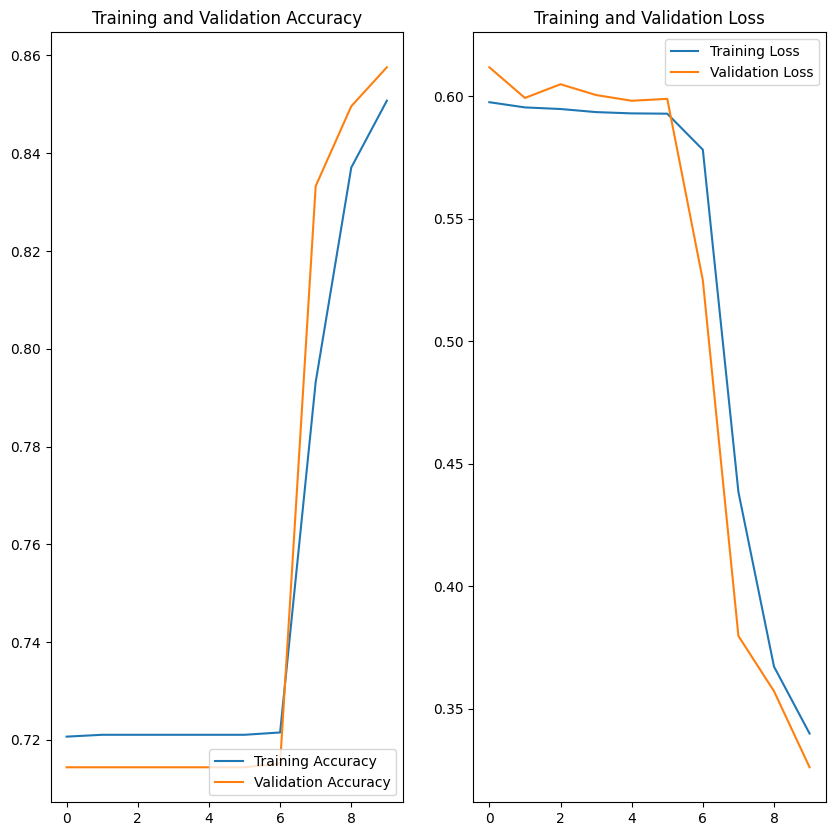

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

# Veri Yolu
data_dir = pathlib.Path("/content/drive/MyDrive/SMILEs")

# Ayarlar
batch_size = 32
image_height = 64
image_width = 64

# Eğitim ve Doğrulama Veri Setlerinin Oluşturulması
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size)

# Sınıf İsimlerinin Yazdırılması
class_names = train_ds.class_names
print(class_names)

# Performans İyileştirme
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Sınıf Sayısı
num_classes = len(class_names)

# CNN Modeli
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
    layers.Conv2D(128, (3, 3), activation='sigmoid', input_shape=(image_height, image_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(100, (3, 3), activation='sigmoid'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(72, (3, 3), activation='sigmoid'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(num_classes, activation='sigmoid')
])

# Modelin Derlenmesi
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Modelin Özeti
model.summary()

# Eğitim ve Doğrulama Veri Setlerinin Boyutlarının Yazdırılması
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

# Modelin Eğitilmesi
num_epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=num_epochs)

# Eğitim Sonuçlarının Görselleştirilmesi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(num_epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

4. olarak dropout ekledim

Found 13165 files belonging to 2 classes.
Using 10532 files for training.
Found 13165 files belonging to 2 classes.
Using 2633 files for validation.
['negatives', 'positives']
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 100)       115300    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 100)       0         
 g2D)       

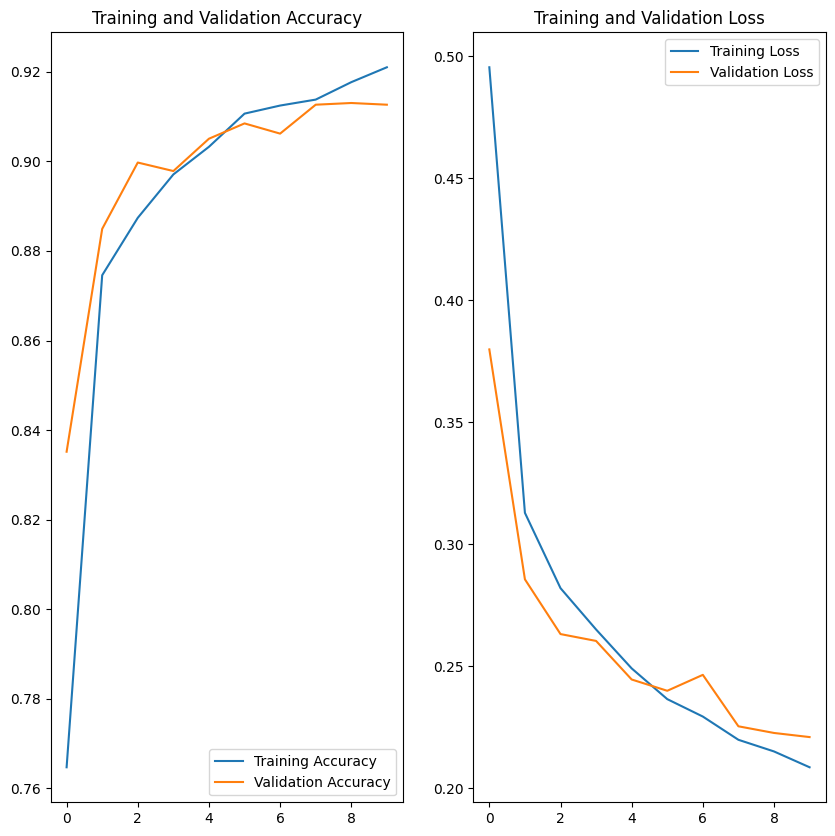

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

# Veri Yolu
data_dir = pathlib.Path("/content/drive/MyDrive/SMILEs")

# Ayarlar
batch_size = 32
image_height = 64
image_width = 64

# Eğitim ve Doğrulama Veri Setlerinin Oluşturulması
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size)

# Sınıf İsimlerinin Yazdırılması
class_names = train_ds.class_names
print(class_names)

# Performans İyileştirme
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Sınıf Sayısı
num_classes = len(class_names)

# CNN Modeli
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(100, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(72, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout ekledim
    layers.Dense(num_classes)
])

# Modelin Derlenmesi
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Modelin Özeti
model.summary()

# Eğitim ve Doğrulama Veri Setlerinin Boyutlarının Yazdırılması
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

# Modelin Eğitilmesi
num_epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=num_epochs)

# Eğitim Sonuçlarının Görselleştirilmesi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(num_epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()